In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import shap


In [2]:
# Load models
lrc = joblib.load("../models/logistic_regression_text_model.pkl")
rfc = joblib.load("../models/random_forest_model.pkl")
xgb = joblib.load("../models/xgboost_model.pkl")

In [4]:
# Load data
X_train = joblib.load("../data/preprocessed/X_train_preprocessed.pkl")
X_test = joblib.load("../data/preprocessed/X_test_preprocessed.pkl")

# Sample to reduce computation time
X_train_sample = shap.sample(X_train, 1000, random_state=42).toarray()
X_test_sample = shap.sample(X_test, 1000, random_state=42).toarray()

In [3]:
print(type(lrc)) 
print(type(rfc)) 
print(type(xgb)) 

<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'xgboost.sklearn.XGBClassifier'>


## Logistic Regression SHAP by Explainer

In [ ]:
# SHAP for Logistic regression
explainer_lrc = shap.Explainer(lrc, X_train_sample)
shap_val_lrc = explainer_lrc(X_test_sample)

class_names = lrc.classes_

In [ ]:
# Determine the most and the least confident prediction by model
probs_lrc = lrc.predict_proba(X_test_sample)  # shape: (n_samples, n_classes)

# Pick the sample with the highest max probability
confidences_lrc = probs_lrc.max(axis=1)
most_confident_idx_lrc = np.argmax(confidences_lrc)

print("Most confident prediction:", confidences_lrc[most_confident_idx_lrc])
print("Most confident sample index:", most_confident_idx_lrc)
print("Most confident sample's class:", np.argmax(probs_lrc[most_confident_idx_lrc]))


# lowest confidence
print("Least confident sample index:", np.argmin(confidences_lrc))
print("Least confident sample's class:", np.argmax(probs_lrc[np.argmin(confidences_lrc)]))

Most confident prediction: 0.9999999791459406
Most confident sample index: 736
Most confident sample's class: 3
Least confident sample index: 916
Least confident sample's class: 24


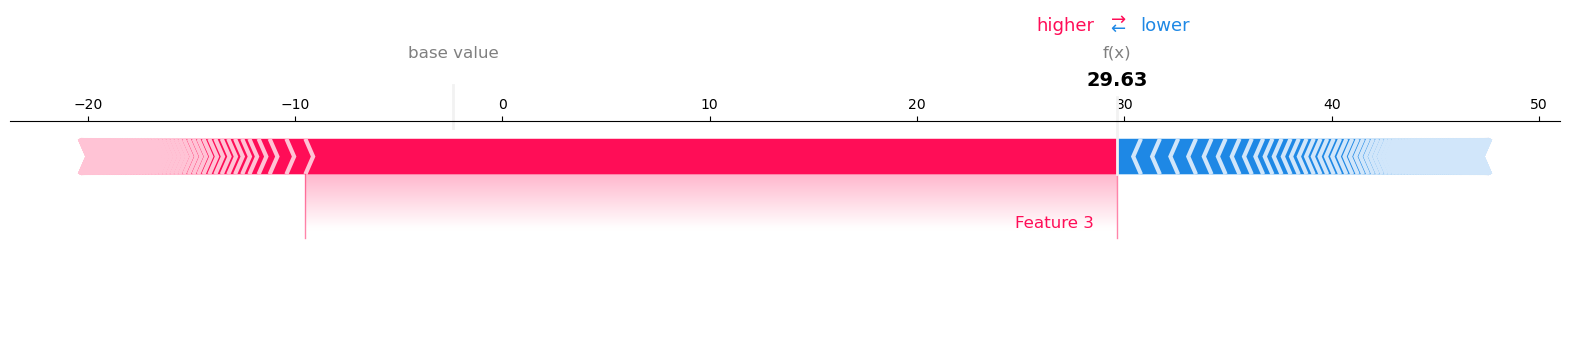

In [11]:
## Most confident prediction
shap.initjs()
shap.force_plot(explainer_lrc.expected_value[3], shap_val_lrc.values[736,:,3],
                matplotlib=True)

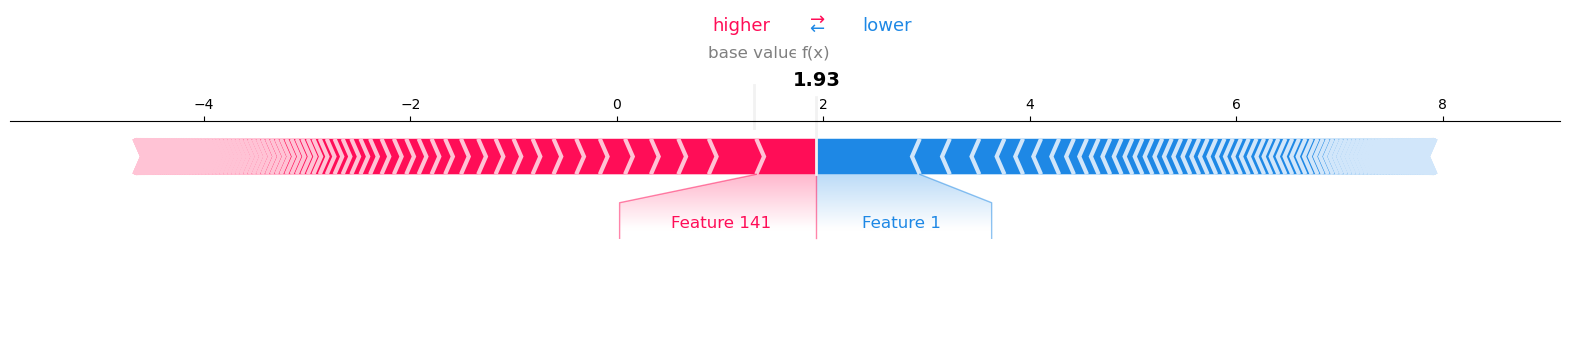

In [12]:
## Least confident prediction
shap.initjs()
shap.force_plot(explainer_lrc.expected_value[24], shap_val_lrc.values[916,:,24],
                matplotlib=True)

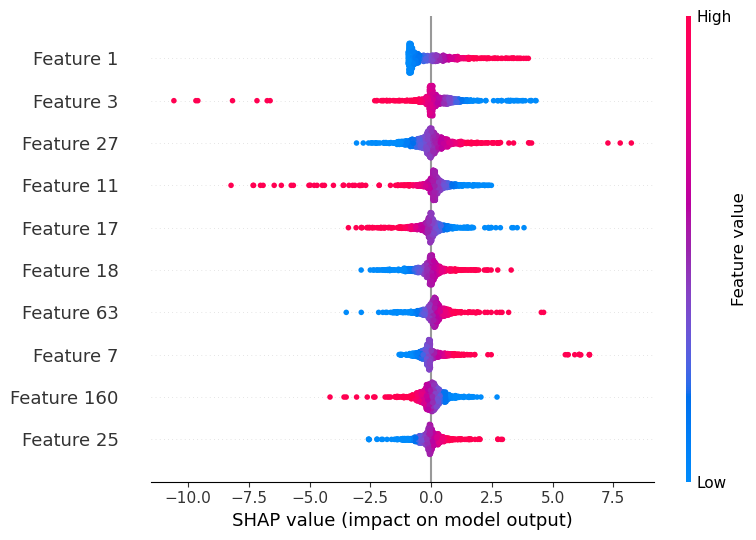

In [ ]:
# Summary plot for class 1320
shap.summary_plot(shap_val_lrc.values[:, :, 12], X_test_sample, max_display = 10)

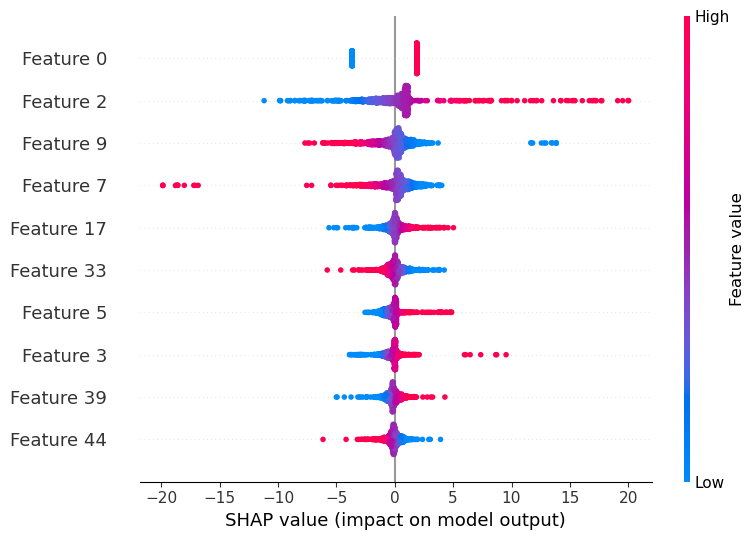

In [ ]:
# Summary plot of the class with highest F1 score
shap.summary_plot(shap_val_lrc.values[:, :, 26], X_test_sample, max_display = 10)

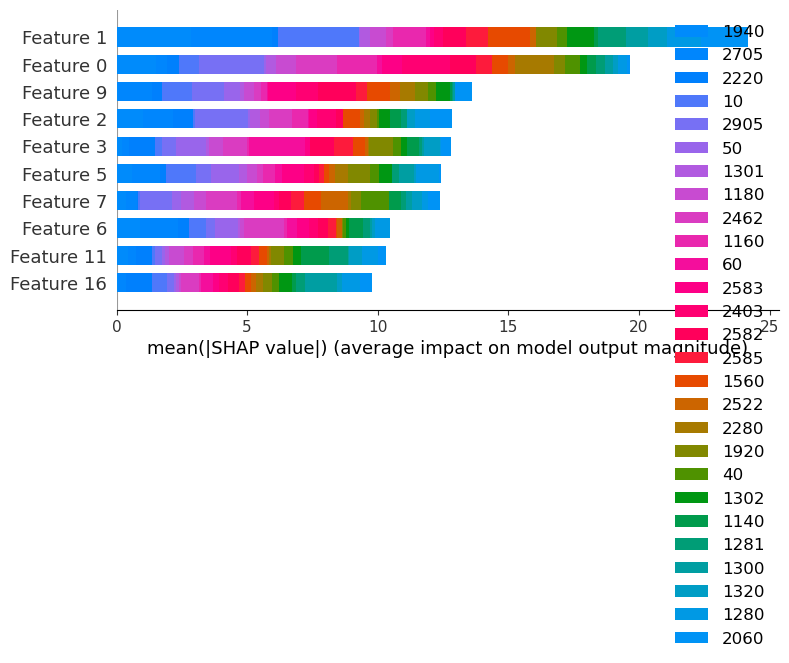

In [ ]:
# Bar summary plot of 10 best features used in logistic regression
shap.summary_plot(shap_val_lrc.values, X_test_sample, max_display = 10, plot_type="bar", class_names = class_names)

## Random Forest SHAP by TreeExplainer

In [ ]:
# SHAP for Random Forest
explainer_rf = shap.TreeExplainer(rfc, data=X_train_sample)
shap_val_rf = explainer_rf(X_test_sample)

100%|===================| 26999/27000 [270:43<00:00]         

In [16]:
class_names = rfc.classes_

In [ ]:
# Determine the most and the least confident prediction by model
probs_rf = rfc.predict_proba(X_test_sample)  # shape: (n_samples, n_classes)

# Pick the sample with the highest max probability
confidences_rf = probs_rf.max(axis=1)
most_confident_idx_rf = np.argmax(confidences_rf)

print("Most confident prediction:", confidences_rf[most_confident_idx_rf])
print("Most confident sample index:", most_confident_idx_rf)
print("Most confident sample's class:", np.argmax(probs_rf[most_confident_idx_rf]))


# lowest confidence
print("Least confident sample index:", np.argmin(confidences_rf))
print("Least confident sample's class:", np.argmax(probs_rf[np.argmin(confidences_rf)]))

Most confident prediction: 1.0
Most confident sample index: 29
Most confident sample's class: 12
Least confident sample index: 619
Least confident sample's class: 14


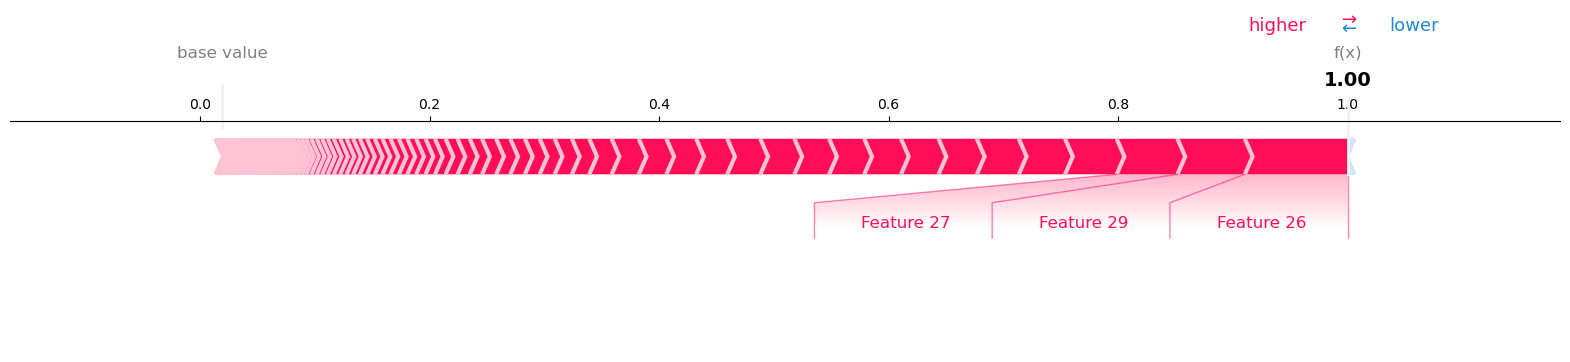

In [ ]:
### Most confident prediction
shap.initjs()
shap.force_plot(explainer_rf.expected_value[12], shap_val_rf.values[29,:,12],
                matplotlib=True)

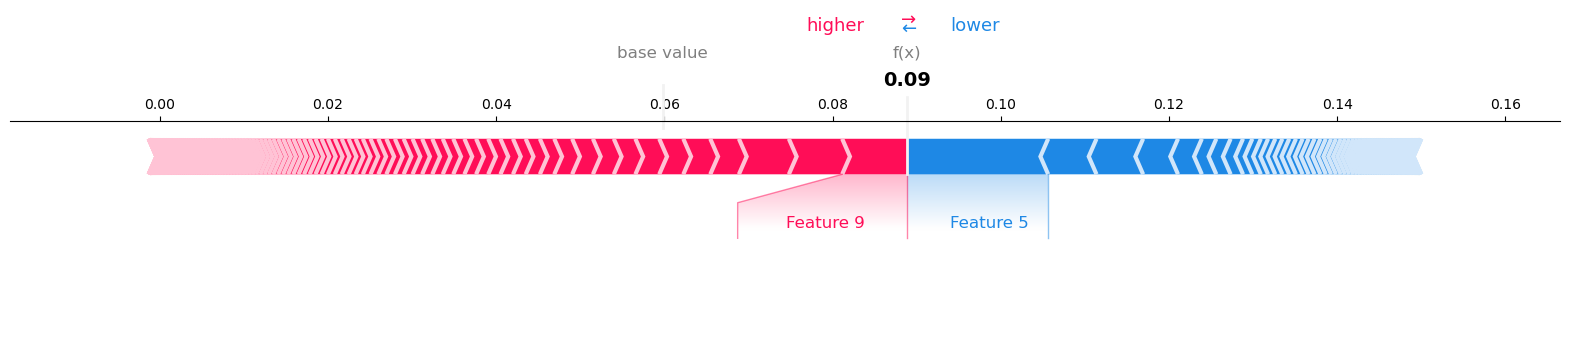

In [ ]:
### Least confident prediction
shap.initjs()
shap.force_plot(explainer_rf.expected_value[14], shap_val_rf.values[619,:,14],
                matplotlib=True)

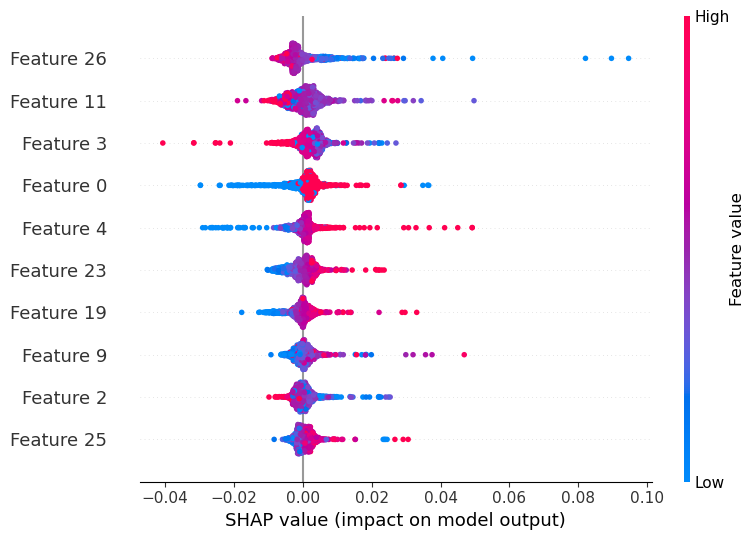

In [ ]:
# Summary plot for class 1320
shap.summary_plot(shap_val_rf.values[:, :, 12], X_test_sample, max_display = 10)

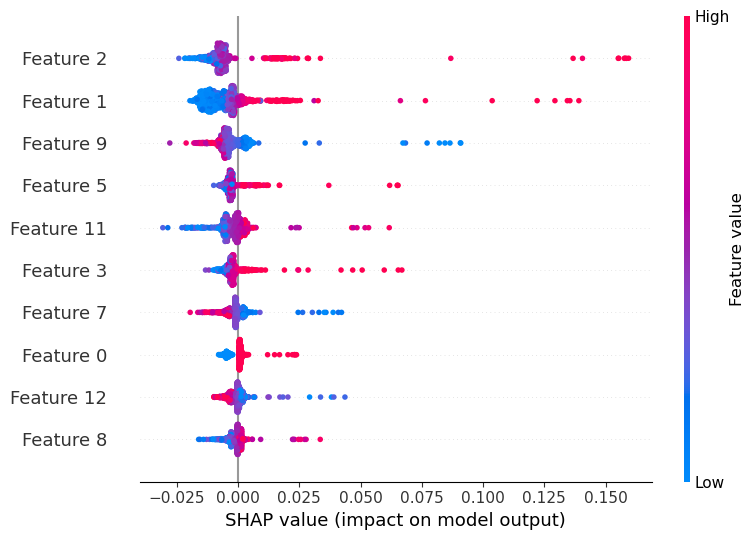

In [ ]:
# Summary plot of class with the highest F1 score
shap.summary_plot(shap_val_rf.values[:, :, 26], X_test_sample, max_display = 10)

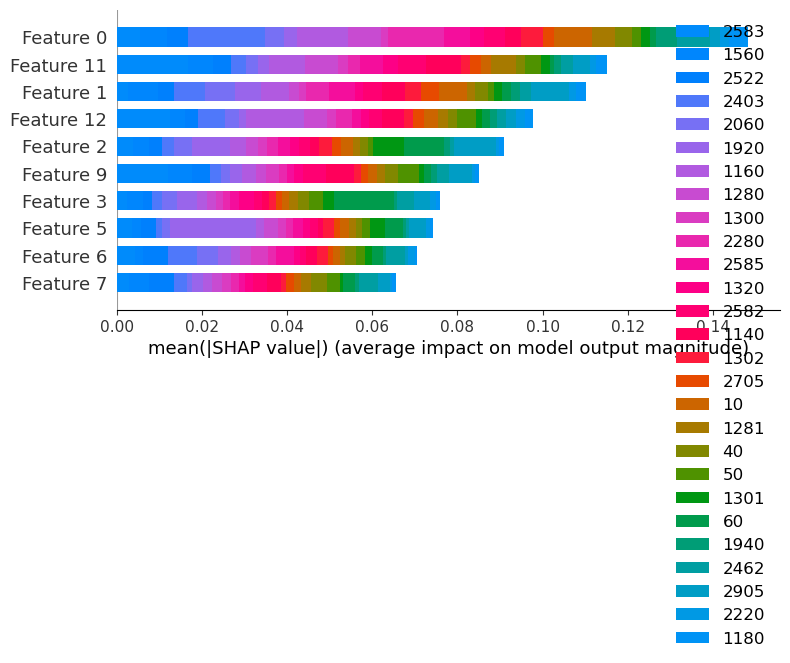

In [ ]:
# Bar summary plot of 10 best features used in Random Forest
shap.summary_plot(shap_val_rf.values, X_test_sample, max_display = 10, plot_type="bar", class_names = class_names)

## XGBoost SHAP by TreeExplainer

In [ ]:
# SHAP for XGBoost
explainer_xgb = shap.TreeExplainer(xgb, data=X_train_sample)
shap_val_xgb = explainer_xgb(X_test_sample)

100%|===================| 26998/27000 [236:25<00:01]         

In [ ]:
# Determine the most and the least confident prediction by model
probs_xgb = xgb.predict_proba(X_test_sample)  # shape: (n_samples, n_classes)

# Pick the sample with the highest max probability
confidences_xgb = probs_xgb.max(axis=1)
most_confident_idx_xgb = np.argmax(confidences_xgb)

print("Most confident prediction:", confidences_xgb[most_confident_idx_xgb])
print("Most confident sample index:", most_confident_idx_xgb)
print("Most confident sample's class:", np.argmax(probs_xgb[most_confident_idx_xgb]))


# lowest confidence
print("Least confident sample index:", np.argmin(confidences_xgb))
print("Least confident sample's class:", np.argmax(probs_xgb[np.argmin(confidences_xgb)]))

Most confident prediction: 0.9999807
Most confident sample index: 918
Most confident sample's class: 26
Least confident sample index: 422
Least confident sample's class: 21


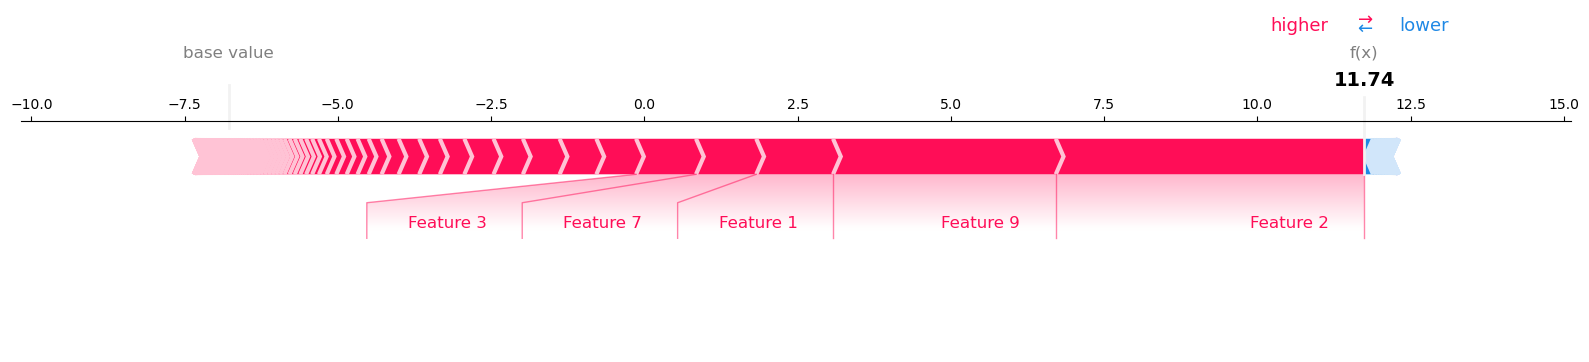

In [ ]:
### Most confident prediction

shap.initjs()
shap.force_plot(explainer_xgb.expected_value[26], shap_val_xgb.values[918,:,26],
                matplotlib=True)

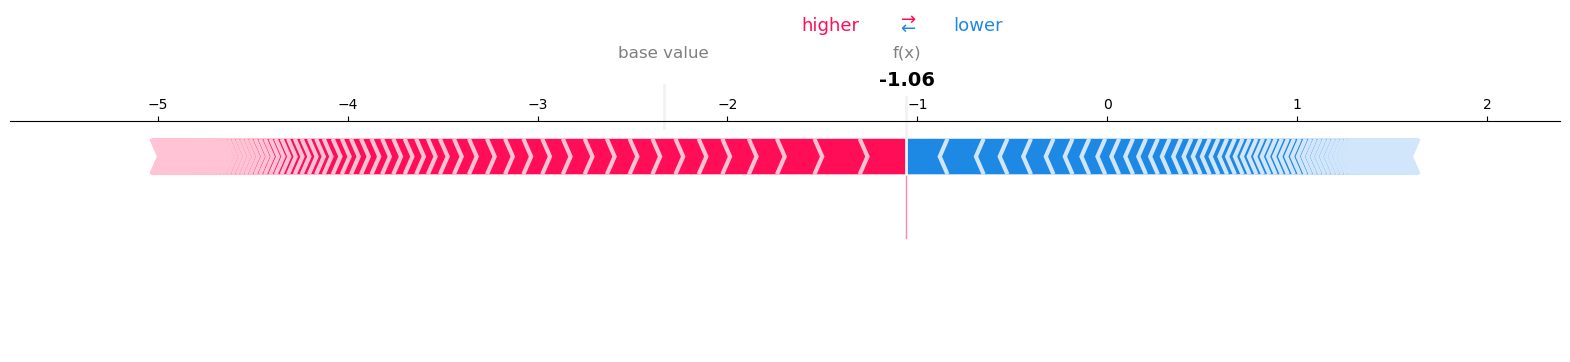

In [ ]:
### Least confident prediction

shap.initjs()
shap.force_plot(explainer_xgb.expected_value[21], shap_val_xgb.values[422,:,21],
                matplotlib=True)

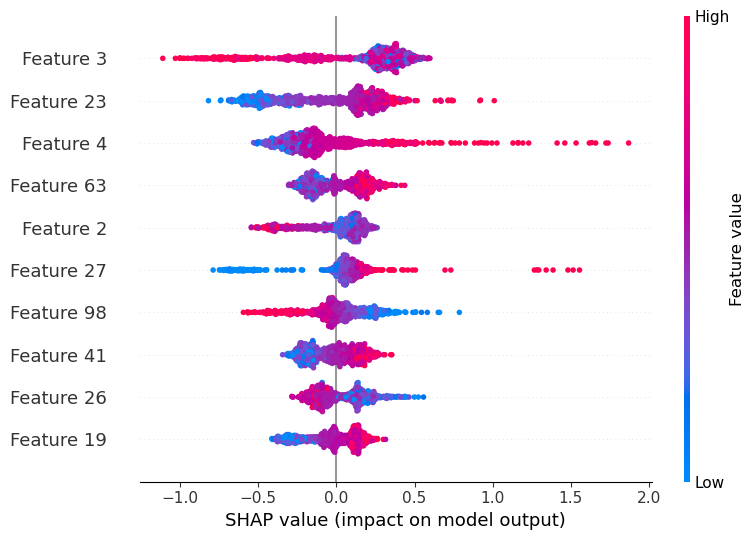

In [ ]:
# Summary plot for class 1320
shap.summary_plot(shap_val_xgb.values[:, :, 12], X_test_sample, max_display = 10)

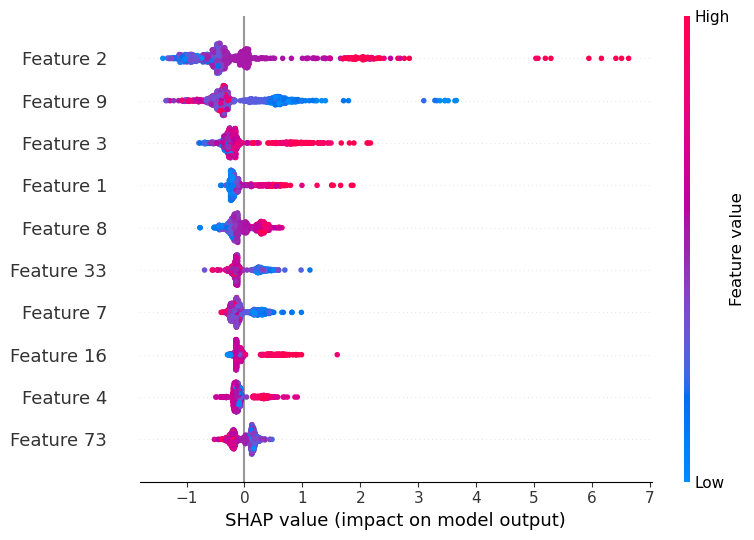

In [ ]:
# Summary plot of the class with the highest F1 score
shap.summary_plot(shap_val_xgb.values[:, :, 26], X_test_sample, max_display = 10)

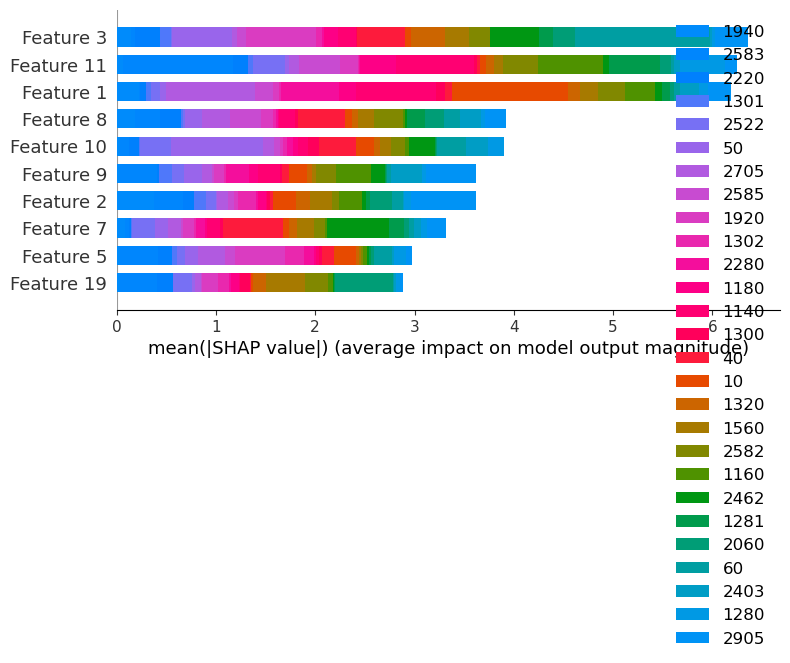

In [ ]:
# Bar summary plot of 10 best features used in XGBoost
shap.summary_plot(shap_val_xgb.values, X_test_sample, max_display = 10, plot_type="bar", class_names = class_names)